In [26]:
import sys
import os
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.impute import SimpleImputer
from sklearn import linear_model, metrics, svm,tree
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import f1_score, mean_squared_error, r2_score,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import KernelPCA
from sklearn.metrics import average_precision_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_path="/content/drive/MyDrive/p02"

In [4]:
file_path= os.path.join(project_path,"dataset/creditcard.csv")
df=pd.read_csv(file_path)
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

## Dataset EDA


1.   Missing Values : No Missing Value has been found in the dataset
2.   Class Distribution : Higly imbalanced data with only 0.17% are fraud transcation cases
2.   Predictors Distribution
3.   Correlation
4.   Normalizing Data






In [ ]:
df.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [ ]:
# check for Missing value
print(df.isna().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


We did not find any NA / missing values in our dataset.So we don't have to work on ways to replace values.

In [ ]:
# Class distribution Data Imbalance
genuine=round(df['Class'].value_counts()[0]/len(df) * 100,2)
fraud=round(df['Class'].value_counts()[1]/len(df) * 100,2)
print('Genuine Transcations :', genuine,'%')
print('Frauds Transcations :',fraud,'%')

Genuine Transcations : 99.83 %
Frauds Transcations : 0.17 %


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


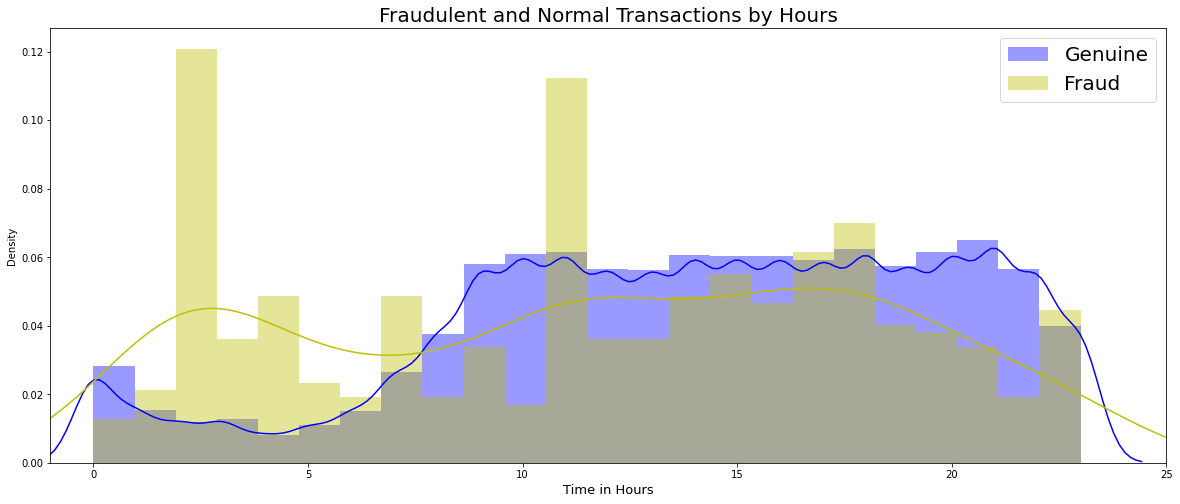

In [ ]:
data=df.copy()
timedelta = pd.to_timedelta(data['Time'], unit='s')

data['mins'] = (timedelta.dt.components.minutes).astype(int)
data['hours'] = (timedelta.dt.components.hours).astype(int)
plt.figure(figsize=(20,8))

sns.distplot(data[data['Class'] == 0]['hours'], bins=24, color='b',label="Genuine")
sns.distplot(data[data['Class'] == 1]["hours"], bins=24, color='y',label="Fraud")

plt.title('Fraudulent and Normal Transactions by Hours', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
plt.xlim([-1,25])
plt.legend(prop={'size': 20})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


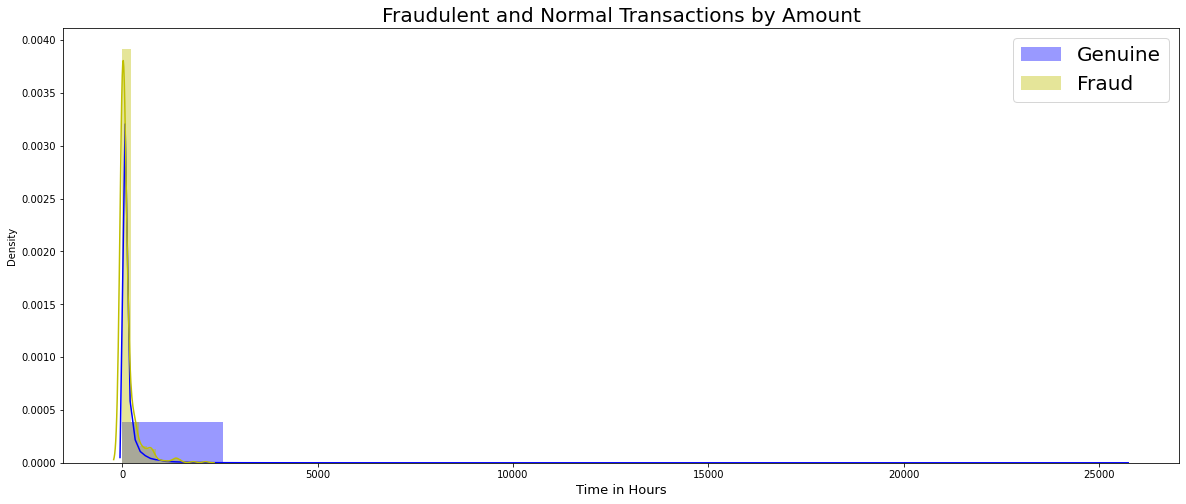

In [ ]:
data=df.copy()
plt.figure(figsize=(20,8))

sns.distplot(data[data['Class'] == 0]['Amount'], bins=10, color='b',label="Genuine")
sns.distplot(data[data['Class'] == 1]["Amount"], bins=10, color='y',label="Fraud")

plt.title('Fraudulent and Normal Transactions by Amount', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
# plt.xlim([-1,25])
plt.legend(prop={'size': 20})
plt.show()

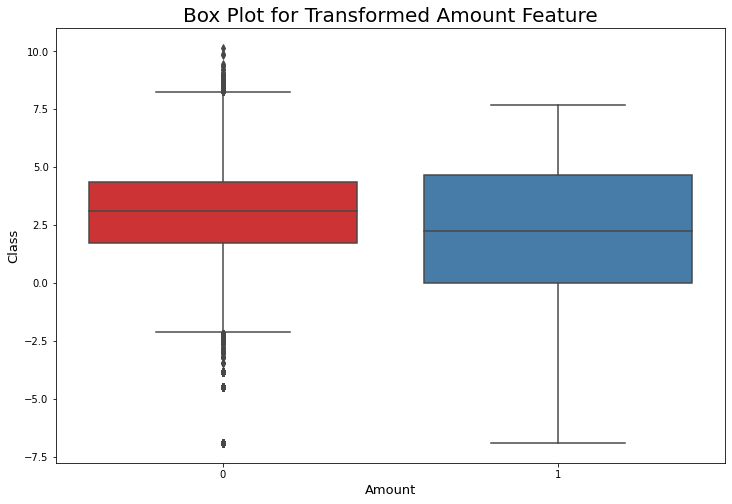

In [ ]:
data=df.copy()
data['Amount'] = np.log(data['Amount'] + 0.001)
plt.figure(figsize=(12,8))
sns.boxplot(x ="Class", y="Amount", data=data, palette='Set1');
plt.xlabel("Amount", fontsize=13)
plt.ylabel("Class", fontsize=13)
plt.title("Box Plot for Transformed Amount Feature", fontsize=20);

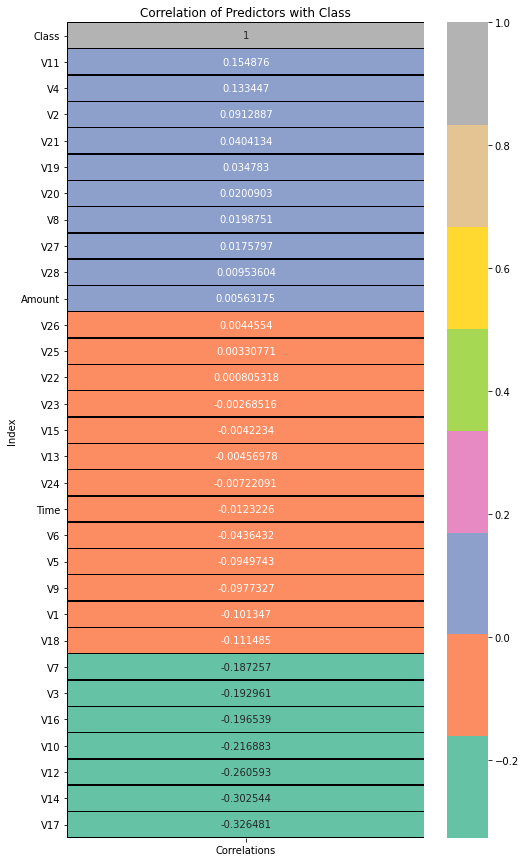

In [ ]:
import plotly.graph_objs as go
import plotly
import plotly.offline as py

corr = df.corrwith(data['Class']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set2', linewidths=0.4, linecolor='black')

plt.title("Correlation of Predictors with Class")
plt.show()

NameError: ignored

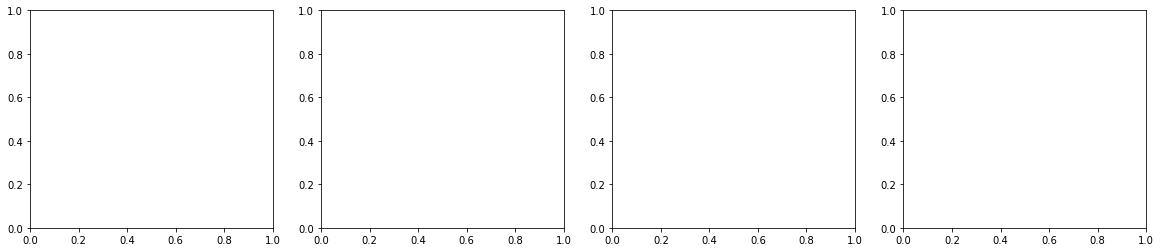

In [ ]:

# df = df.sample(frac=1)

# # amount of fraud classes 492 rows.
# fraud_df = df.loc[df['Class'] == 1]
# non_fraud_df = df.loc[df['Class'] == 0][:492]

# normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# # Shuffle dataframe rows
# new_df = normal_distributed_df.sample(frac=1, random_state=42)


# new_df=df.copy()
# new_df -= new_df.min()  # equivalent to df = df - df.min()

# new_df /= new_df.max()


f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette='bright', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette='bright', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette='bright', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette='bright', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()



## Data split and Feature Transformations



1.   Data split: Train-Test Data 50-50
2.   Polynomial Features/Predictors: Added 2 degree polynomial features
3.   Scaling of Features/Predictors
4.   Resampling to handle class imbalance
     
*   Undersampling
*   Oversampling
*   Synthetic Minority Oversampling Technique (SMOTE)






In [5]:
# Train-test split 50-50 (STRATIFY SPLIT)
X = df.iloc[:,1:30].to_numpy()
y = df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=2)

In [6]:
#polynomial Features

poly_feat=PolynomialFeatures(2)
poly_feat.fit(X_train)
X_train_poly=poly_feat.transform(X_train)
X_test_poly=poly_feat.transform(X_test)


In [7]:

# feature scaling for Normal Features
scaler=StandardScaler()
scaler.fit(X_train)
X_train_nrml=scaler.transform(X_train)
X_test_nrml=scaler.transform(X_test)

# feature scaling for Polynomial Features
scaler=StandardScaler()
scaler.fit(X_train_poly)
X_train_poly=scaler.transform(X_train_poly)
X_test_poly=scaler.transform(X_test_poly)

## MODELS

1. Logistic Regression



#### Evaluation Metrics:

Since we have highly class imbalancec dataset, we will f1score and Area under the ROC cureve as the measure of performance 

#### Logistic Regression Experiments


*   Simple Logistic Regression
*   Logistic Regression (LR) with Polynomial Features
*   CV LR with Linear Features
*   Logistic Regression with polynomial features (under Sampling)
* Logistic Regression with polynomial features (Over Sampling)
* Logistic Regression with polynomial features (SMOTE)
* Logistic Regression with Feature Selections (Forward and Backward Selection)






In [14]:
def logistic_regression_func(clf,X_train,y_train,X_test,y_test,modelname):
  lr_clf=clf.fit(X_train,y_train)
  y_pred_train=lr_clf.predict(X_train)
  y_prob_train=lr_clf.predict_proba(X_train)
  y_pred_test=lr_clf.predict(X_test)

  f1_train =f1_score(y_train,y_pred_train)
  f1_test =f1_score(y_test,y_pred_test)

  plot_confusion_matrix(lr_clf, X_test, y_test) 
  plt.title(modelname)
  plt.show()

  pr_curve_test=plot_precision_recall_curve(lr_clf,X_test, y_test)
  plt.show()

  AP_train=average_precision_score(y_train,y_prob_train[:,1])
  # plt.show()

  print("Train Score: F1Score:{}  Avg Precision-recall score:{}".format(f1_train,AP_train) )
  print("Test Score: F1Score:{} Avg Precision-recall score:{}".format(f1_test,pr_curve_test.average_precision) )

  return 

##### Simple Logistic Regression

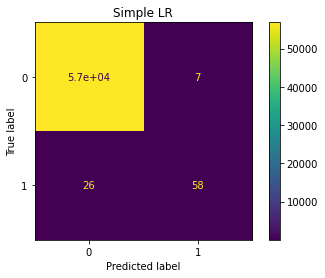

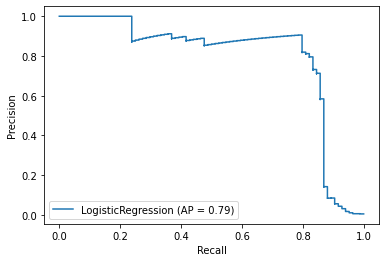

Train Score: F1Score:0.7296137339055795  Avg Precision-recall score:0.7640668410640499
Test Score: F1Score:0.7785234899328859 Avg Precision-recall score:0.7932028735616562


In [15]:
# Simple Logistic Regression

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)
logistic_regression_func(clf,X_train_nrml,y_train,X_test_nrml,y_test,"Simple LR")


##### Logistic Regression with Polynomial Features (Degreee 2)

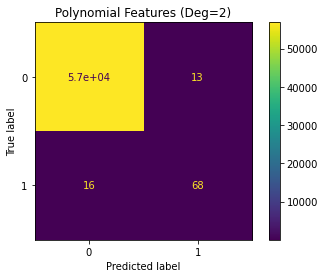

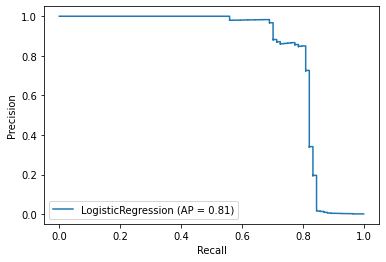

Train Score: F1Score:0.9230769230769231  Avg Precision-recall score:0.936782733897239
Test Score: F1Score:0.8242424242424242 Avg Precision-recall score:0.8078903241686461


In [25]:
# Logistic Regression (LR) with Polynomial Features

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr')
logistic_regression_func(clf,X_train_poly,y_train,X_test_poly,y_test,"Polynomial Features (Deg=2)")


##### CV LR  (No Polynomial Features)

In [16]:
X_train,X_test = X_train_nrml, X_test_nrml

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)

cv_results = cross_validate(clf, X_train, y_train, cv=3,scoring='f1',return_estimator=True)
sorted(cv_results.keys())
print(cv_results['test_score'])
idx=cv_results['test_score'].argmax()
clf=cv_results['estimator'][idx]

[0.71861472 0.76987448 0.66666667]


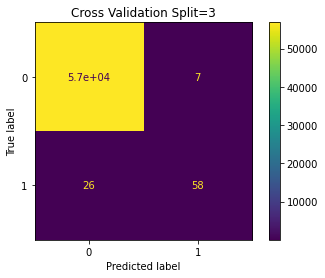

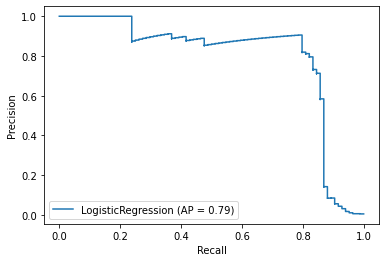

Train Score: F1Score:0.7296137339055795  Avg Precision-recall score:0.7640668410640499
Test Score: F1Score:0.7785234899328859 Avg Precision-recall score:0.7932028735616562


In [17]:
logistic_regression_func(clf,X_train_nrml,y_train,X_test_nrml,y_test,"Cross Validation Split=3")

##### LR with Over Sampling

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


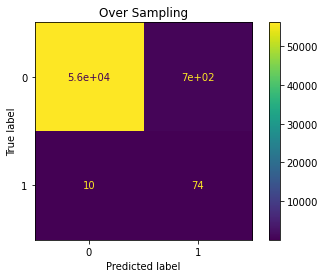

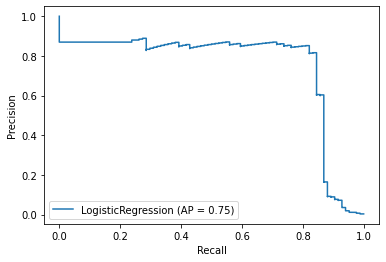

Train Score: F1Score:0.9381598518099444  Avg Precision-recall score:0.9807016634298975
Test Score: F1Score:0.1722933643771828 Avg Precision-recall score:0.7481128951973933


In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42,sampling_strategy=0.5)
X_res, y_res = ros.fit_resample(X_train_nrml, y_train)

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)
logistic_regression_func(clf,X_res,y_res,X_test_nrml,y_test,"Over Sampling")

##### LR with Under Sampling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


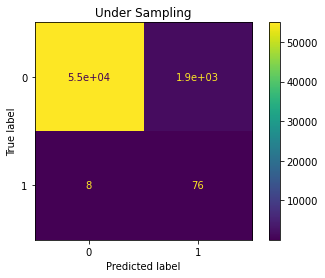

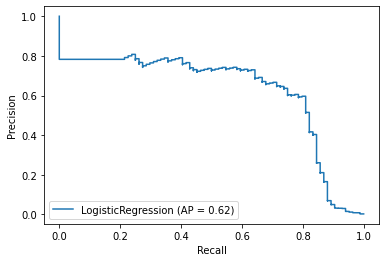

Train Score: F1Score:0.9494949494949494  Avg Precision-recall score:0.9884278490567078
Test Score: F1Score:0.07342995169082125 Avg Precision-recall score:0.6249219519197623


In [19]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_nrml, y_train)

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)
logistic_regression_func(clf,X_res,y_res,X_test_nrml,y_test,"Under Sampling")

##### SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


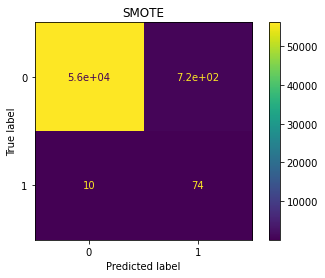

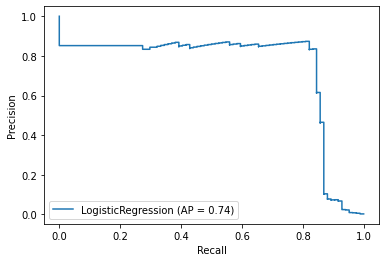

Train Score: F1Score:0.9321213898255389  Avg Precision-recall score:0.9825836864015836
Test Score: F1Score:0.16953035509736541 Avg Precision-recall score:0.7406948647304757


In [20]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=42,sampling_strategy=0.5)
X_res, y_res = ros.fit_resample(X_train_nrml, y_train)

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)
logistic_regression_func(clf,X_res,y_res,X_test_nrml,y_test,"SMOTE")

##### Feature Selection

In [21]:
from sklearn.feature_selection import RFE, RFECV

clf=LogisticRegression(class_weight='auto',max_iter=3000,multi_class='ovr',n_jobs=4)
selector = RFE(clf, step=1,n_features_to_select=15)
# selector = RFECV(clf, step=1, cv=3,scoring='f1')
selector = selector.fit(X_train_nrml,y_train)
print(selector.support_)
print(selector.ranking_)

# X_test_new=X_test[:,selector.support_]
clf=selector.estimator_

[ True False False  True  True False False  True  True  True False False
  True  True False  True False False False  True  True  True False  True
 False False  True False  True]
[ 1 14  3  1  1  4  2  1  1  1 10  9  1  1  7  1 15 11  6  1  1  1  8  1
 12 13  1  5  1]


In [ ]:
sum(selector.support_)
selector.estimator_

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='ovr', n_jobs=4, penalty='l2', random_state=None,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [22]:
X_train_feat= X_train_nrml[:,selector.support_]
X_test_feat=X_test_nrml[:,selector.support_]

poly_feat=PolynomialFeatures(2)
poly_feat.fit(X_train_feat)
X_train_feat=poly_feat.transform(X_train_feat)
X_test_feat=poly_feat.transform(X_test_feat)

scaler=StandardScaler()
scaler.fit(X_train_feat)
X_train_feat=scaler.transform(X_train_feat)
X_test_feat=scaler.transform(X_test_feat)



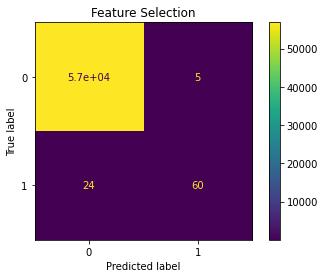

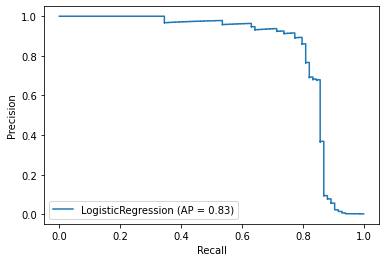

Train Score: F1Score:0.8405405405405405  Avg Precision-recall score:0.859094823112701
Test Score: F1Score:0.8053691275167787 Avg Precision-recall score:0.8278722631063924


In [23]:
logistic_regression_func(clf,X_train_feat,y_train,X_test_feat,y_test,"Feature Selection")

Ridge Regression

In [ ]:
def ridge_classification_func(clf,X_train,y_train,X_test,y_test):
  lr_clf=clf.fit(X_train,y_train)
  y_pred_train=lr_clf.predict(X_train)
  y_prob_train=lr_clf.decision_function(X_train)
  y_pred_test=lr_clf.predict(X_test)

  f1_train =f1_score(y_train,y_pred_train)
  f1_test =f1_score(y_test,y_pred_test)

  plot_confusion_matrix(lr_clf, X_test, y_test) 
  plt.show()

  pr_curve_test=plot_precision_recall_curve(lr_clf,X_test, y_test)
  plt.show()

  AP_train=average_precision_score(y_train,y_prob_train)
  # plt.show()

  print("Train Score: F1Score:{}  Avg Precision-recall score:{}".format(f1_train,AP_train) )
  print("Test Score: F1Score:{} Avg Precision-recall score:{}".format(f1_test,pr_curve_test.average_precision) )

  return 0

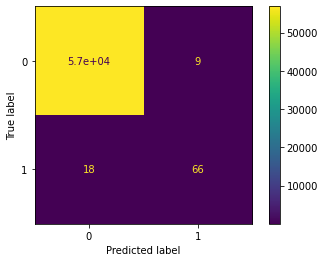

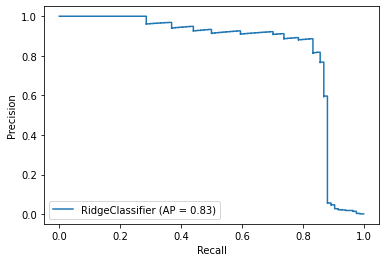

Train Score: F1Score:0.8331143232588699  Avg Precision-recall score:0.839079001590252
Test Score: F1Score:0.830188679245283 Avg Precision-recall score:0.8303647915316331


0

In [ ]:
clf=RidgeClassifier(max_iter=3000)
ridge_classification_func(clf,X_train_poly,y_train,X_test_poly,y_test)

##### Ridge Classification with Feature selectiona and polynomial features (Degree 2)

In [ ]:
clf=RidgeClassifier(max_iter=3000)
selector = RFE(clf, step=1,n_features_to_select=15)
# selector = RFECV(clf, step=1, cv=3,scoring='f1')
selector = selector.fit(X_train_nrml,y_train)
print(selector.support_)
print(selector.ranking_)

# X_test_new=X_test[:,selector.support_]
clf=selector.estimator_

[ True  True  True  True  True  True  True False  True  True  True  True
 False  True False  True  True  True False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  1  5  1  1  1  1 12  1 14  1  1  1  3 13  4 10 15  8
  9 11  6  7  2]


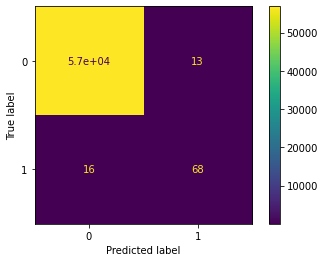

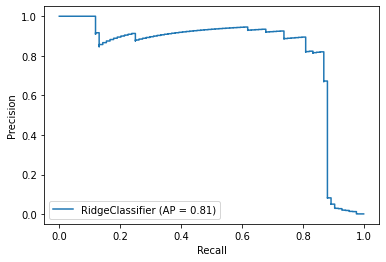

Train Score: F1Score:0.8157894736842105  Avg Precision-recall score:0.8054507195695736
Test Score: F1Score:0.8242424242424242 Avg Precision-recall score:0.8096663787807186


0

In [ ]:
# Ridge Classifer
X_train_feat= X_train_nrml[:,selector.support_]
X_test_feat=X_test_nrml[:,selector.support_]

poly_feat=PolynomialFeatures(2)
poly_feat.fit(X_train_feat)
X_train_feat=poly_feat.transform(X_train_feat)
X_test_feat=poly_feat.transform(X_test_feat)

scaler=StandardScaler()
scaler.fit(X_train_feat)
X_train_feat=scaler.transform(X_train_feat)
X_test_feat=scaler.transform(X_test_feat)


ridge_classification_func(clf,X_train_feat,y_train,X_test_feat,y_test)

### Decision Tree

In [ ]:
def decision_tree_func(clf,X_train,y_train,X_test,y_test):
  lr_clf=clf.fit(X_train,y_train)
  y_pred_train=lr_clf.predict(X_train)
  y_prob_train=lr_clf.predict_proba(X_train)
  y_pred_test=lr_clf.predict(X_test)

  f1_train =f1_score(y_train,y_pred_train)
  f1_test =f1_score(y_test,y_pred_test)

  plot_confusion_matrix(lr_clf, X_test, y_test) 
  plt.show()

  pr_curve_test=plot_precision_recall_curve(lr_clf,X_test, y_test)
  plt.show()

  AP_train=average_precision_score(y_train,y_prob_train[:,1])
  # plt.show()

  print("Train Score: F1Score:{}  Avg Precision-recall score:{}".format(f1_train,AP_train) )
  print("Test Score: F1Score:{} Avg Precision-recall score:{}".format(f1_test,pr_curve_test.average_precision) )

  return 0

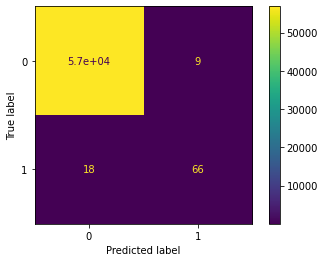

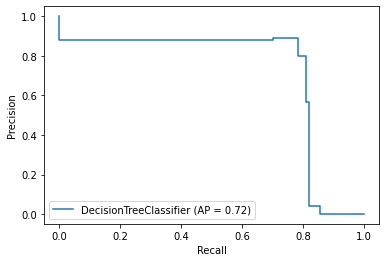

Train Score: F1Score:0.8906455862977603  Avg Precision-recall score:0.8302877080718021
Test Score: F1Score:0.830188679245283 Avg Precision-recall score:0.7200201369775374


0

In [ ]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 6)
decision_tree_func(clf,X_train_nrml,y_train,X_test_nrml,y_test)

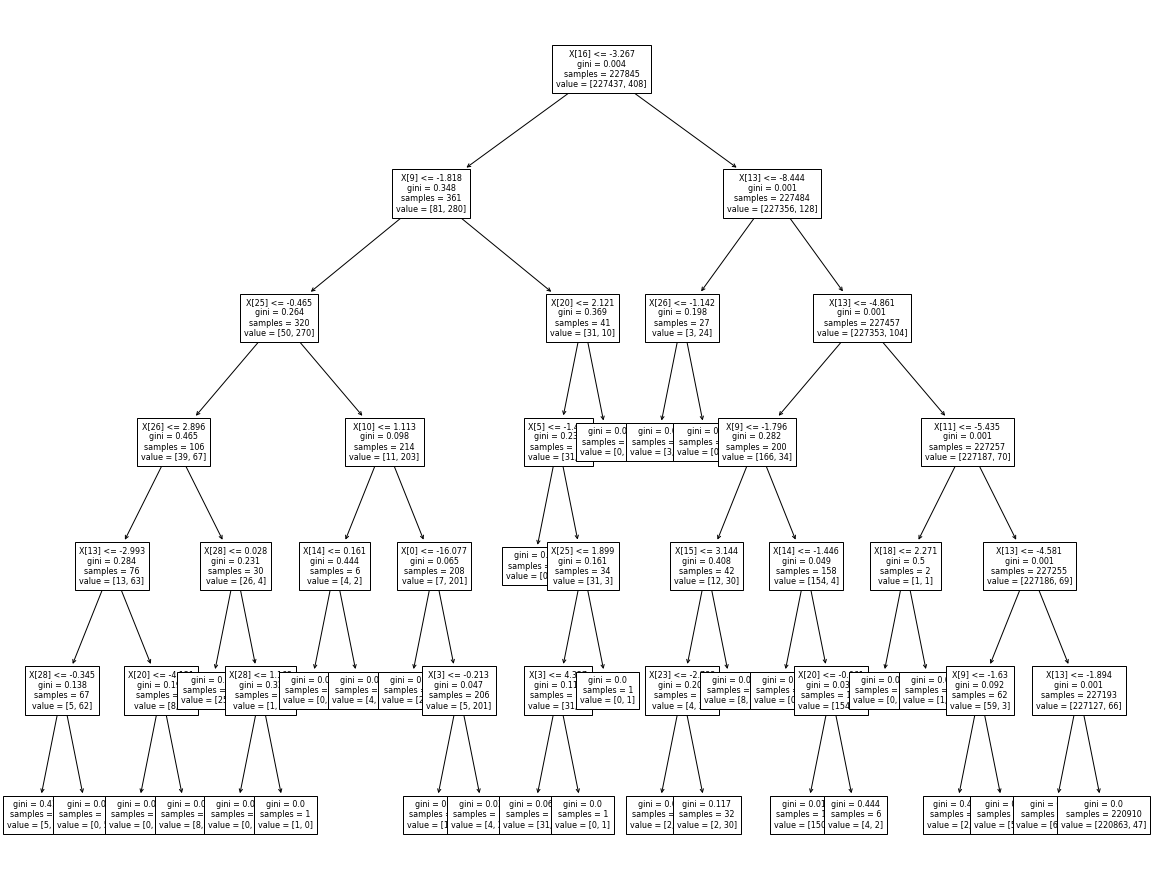

In [ ]:
plt.figure(figsize= (20,16))
tree.plot_tree(clf,fontsize=8)
plt.show()

### Random Forest Classifier

In [ ]:
def Random_Forest_classification_func(clf,X_train,y_train,X_test,y_test):
  lr_clf=clf.fit(X_train,y_train)
  y_pred_train=lr_clf.predict(X_train)
  y_prob_train=lr_clf.predict_proba(X_train)
  y_pred_test=lr_clf.predict(X_test)

  f1_train =f1_score(y_train,y_pred_train)
  f1_test =f1_score(y_test,y_pred_test)

  plot_confusion_matrix(lr_clf, X_test, y_test) 
  plt.show()

  pr_curve_test=plot_precision_recall_curve(lr_clf,X_test, y_test)
  plt.show()

  AP_train=average_precision_score(y_train,y_prob_train[:,1])
  # plt.show()

  print("Train Score: F1Score:{}  Avg Precision-recall score:{}".format(f1_train,AP_train) )
  print("Test Score: F1Score:{} Avg Precision-recall score:{}".format(f1_test,pr_curve_test.average_precision) )

  return 0

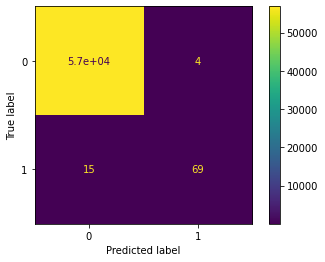

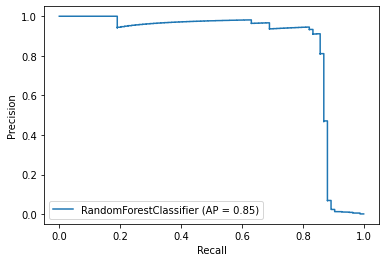

Train Score: F1Score:0.8978494623655914  Avg Precision-recall score:0.9126022476969224
Test Score: F1Score:0.8789808917197452 Avg Precision-recall score:0.8481609129554506


0

In [ ]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
Random_Forest_classification_func(clf,X_train_nrml,y_train,X_test_nrml,y_test)

### Neural Networks

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class CreditDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


class CreditFraud(nn.Module):
    def __init__(self, num_features):
        super(CreditFraud, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 64)
        self.layer_2 = nn.Linear(64, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))

        x = self.layer_out(x)
        return self.sigmoid(x)

    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
  
        x = self.layer_out(x)
        return self.sigmoid(x)

def train_eval(model,train_loader,test_loader,criterion,optimizer,sch,EPOCHS,device):

    print("Begin training.")
    loss_stats = {
    'train': []}
    for e in (range(1, EPOCHS+1)):
    
        # TRAINING
        train_epoch_loss = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()
            
            y_train_pred = model(X_train_batch)
            
            train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
            
            train_loss.backward()
            optimizer.step()
            
            train_epoch_loss += train_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        lr=optimizer.param_groups[0]['lr']
        print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} LR:{lr}')
        sch.step()
    y_pred_list = []

    with torch.no_grad():
        model.eval()
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            y_test_pred = model(X_test_batch)                
            # y_pred_list.append(y_test_pred.cpu().item())  
            y_pred_list+=y_test_pred.cpu().tolist()

            

    return y_pred_list

In [21]:
print("\n******** Neural Net for classification ********")
print("\n Training:")
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=42,sampling_strategy=0.5)
X_res, y_res = ros.fit_resample(X_train_nrml, y_train)

# X_train_nn=X_res
# y_train_nn=y_res
# X_test_nn=X_test_nrml
# y_test_nn=y_test

# X_train_nn=X_train_poly
# y_train_nn=y_train
# X_test_nn=X_test_poly
# y_test_nn=y_test

X_train_nn=X_train_nrml
y_train_nn=y_train
X_test_nn=X_test_nrml
y_test_nn=y_test

train_dataset = CreditDataset(torch.from_numpy(X_train_nn).float(), torch.from_numpy(y_train_nn).float())
test_dataset = CreditDataset(torch.from_numpy(X_test_nn).float(), torch.from_numpy(y_test_nn).float())

NUM_FEATURES = X_train_nn.shape[1]
NUM_Examples = X_train_nn.shape[0]


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'
model = CreditFraud(NUM_FEATURES)
model.to(device)

EPOCHS = 20
BATCH_SIZE = 128
LEARNING_RATE = 0.001

# Sampler
classes, counts= np.unique(y_train,return_counts=True)
num_samples=sum(counts)
class_weights = [num_samples/counts[i] for i in range(len(counts))]
print(class_weights)
sampler = torch.utils.data.sampler.WeightedRandomSampler(class_weights,num_samples=int(num_samples))

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_dataset, batch_size=128)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
sch=torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.99, last_epoch=-1)

pred_nn=train_eval(model,train_loader,test_loader,criterion,optimizer,sch,EPOCHS,device)

# mse_nn=mean_squared_error(y_test,pred_nn)
# R2score_nn = r2_score(y_test,pred_nn)

# print("MSE :",mse_nn)
# print("R2 score :",R2score_nn)



******** Neural Net for classification ********

 Training:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[1.0017939033666465, 558.4436274509804]
Begin training.
Epoch 001: | Train Loss: 0.01992 LR:0.001
Epoch 002: | Train Loss: 0.00370 LR:0.00099
Epoch 003: | Train Loss: 0.00305 LR:0.0009801
Epoch 004: | Train Loss: 0.00273 LR:0.000970299
Epoch 005: | Train Loss: 0.00254 LR:0.0009605960099999999
Epoch 006: | Train Loss: 0.00241 LR:0.0009509900498999999
Epoch 007: | Train Loss: 0.00228 LR:0.0009414801494009999
Epoch 008: | Train Loss: 0.00219 LR:0.0009320653479069899
Epoch 009: | Train Loss: 0.00204 LR:0.00092274469442792
Epoch 010: | Train Loss: 0.00191 LR:0.0009135172474836408
Epoch 011: | Train Loss: 0.00178 LR:0.0009043820750088043
Epoch 012: | Train Loss: 0.00162 LR:0.0008953382542587163
Epoch 013: | Train Loss: 0.00154 LR:0.0008863848717161291
Epoch 014: | Train Loss: 0.00142 LR:0.0008775210229989678
Epoch 015: | Train Loss: 0.00131 LR:0.0008687458127689781
Epoch 016: | Train Loss: 0.00126 LR:0.0008600583546412883
Epoch 017: | Train Loss: 0.00119 LR:0.0008514577710948754
Epoch 018: |

In [22]:
y_pred=np.array(pred_nn)>0.5
y_pred.astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Text(33.0, 0.5, 'True Labels')

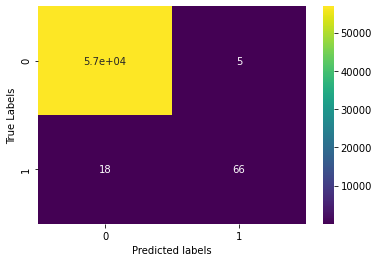

In [23]:
cf_matrix=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='viridis')
plt.xlabel("Predicted labels") 
plt.ylabel("True Labels") 

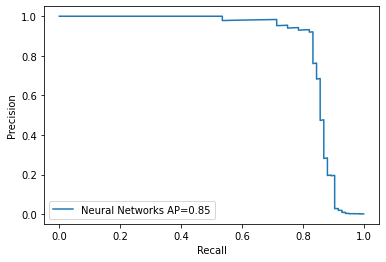

In [34]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_nn)
AP_nn=average_precision_score(y_test, pred_nn)
label_text="Neural Networks AP=" + str(round(AP_nn,2))
plt.plot(lr_recall, lr_precision, label=label_text)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [24]:
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("AP:",average_precision_score(y_test, pred_nn))
print("F1 Score :" ,f1_score(y_test,y_pred))

Precision: 0.9295774647887324
Recall: 0.7857142857142857
AP: 0.8547782915322683
F1 Score : 0.8516129032258065


0.8256880733944953